# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 17.09.2019

Мягкий дедлайн: 23:59MSK 29.09.2019 (за каждый день просрочки снимается 2 балла)

Жесткий дедлайн: 23:59MSK 02.10.2019

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а также привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию, неопрятные графики или **за отсутствие достаточно развернутых ответов на вопросы**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [ ]:
%%bash
pip3 install ipyleaflet
jupyter nbextension enable --py --sys-prefix ipyleaflet

После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [1]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [3]:
import warnings
warnings.simplefilter("ignore")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
data = pd.read_csv("hw2/train.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
import datetime

data.drop(columns=["dropoff_datetime", 'id'], inplace=True)
data['pickup_datetime'] = data['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d\n%H:%M:%S'))

In [6]:
data.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [7]:
from sklearn.model_selection import train_test_split

y = data["trip_duration"]
X = data.drop(columns="trip_duration")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

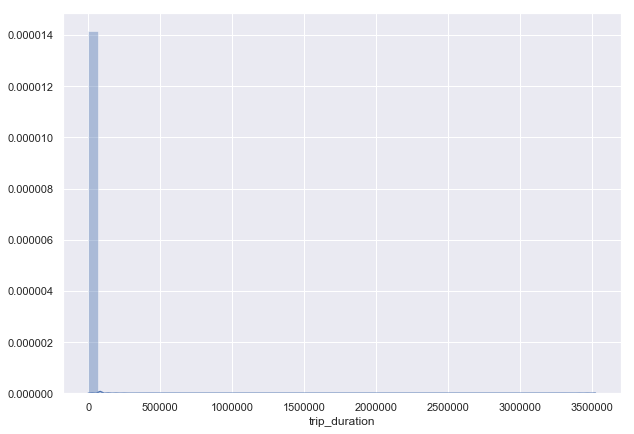

In [8]:
plt.figure(figsize=(10, 7))
sns.distplot(y_train)
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

$\textbf{A:}$ По гистограмме видно, что основной набор значений trip_duration распределен в интервале от 0 до ~62500 (= 500000/8). Тем не менее есть так же очень большие значения, например, превосходящие 3500000, что является немного необычным для длительности поездки, возможно это выбросы.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

rmse - root mean square error
rmsle - root mean sqaure log error


$\textbf{A:}$ Логарифм оценивает порядок, и из его графика хорошо видно, что перепрогноз будет штрафоваться значительно меньше, чем недопрогноз. Выше на гистограмме мы увидели, что есть примеры с довольно большими значениями целевой переменной, поэтому если они окажутся выбросами, то наша модель, используя rmsle, будет менее чувствительна к выбросам, так как перепрогнозы штрафуются меньше, чего нельзя сказать о rmse.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 
$$\text{RMSLE}(y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = $$
$$Замена$$ $$\hat{y}_i = \log{(y_i + 1)}$$
$$\hat{a}(x_i) = \log{(a(x_i) + 1)}$$
$$=\text{RMSE}(\hat{y}_i, \hat{a}(x_i)) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (\hat{y}_i - \hat{a}(x_i))^2}=$$
$$=\sqrt{\text{MSE}(\hat{y}_i, \hat{a}(x_i))}$$.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашим выборкам колонки `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке:

In [9]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [10]:
y_train.loc[:,"log_trip_duration"] = np.log1p(y_train['trip_duration'])
y_test.loc[:,"log_trip_duration"] = np.log1p(y_test['trip_duration'])

In [11]:
X_train.loc[:,"log_trip_duration"] = y_train['log_trip_duration']
X_test.loc[:,"log_trip_duration"] = y_test['log_trip_duration']

In [12]:
X_train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
824746,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,7.134891
645821,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,6.878326
691846,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,7.642524
1147931,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,6.888572
183569,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,6.177944


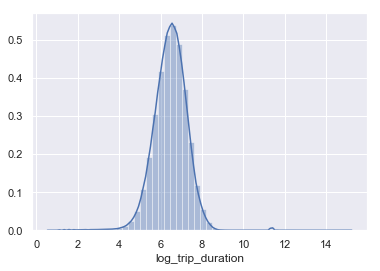

In [13]:
sns.distplot(y_train['log_trip_duration'])

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

$\textbf{A:}$ Так как при правильной замене RMSLE эквивалентен MSE. То лучшее константное предсказание будет достигаться на:
$$\hat{a} = \frac{1}{\ell}\sum_{i=1}^{\ell}\hat{y}_i$$
То есть при
$$a = \exp[\frac{1}{\ell}\sum_{i=1}^{\ell}\log({y}_i + 1)] - 1$$

In [14]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

In [15]:
best_log_constant = y_train["log_trip_duration"].mean()
print("Test RMSLE with best constant = %.4f" % rmse(y_test['log_trip_duration'], best_log_constant))
print("Train RMSLE with best constant = %.4f" % rmse(y_train['log_trip_duration'], best_log_constant))

Test RMSLE with best constant = 0.7943
Train RMSLE with best constant = 0.7964


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [16]:
saved_X_train, saved_X_test, saved_y_train, saved_y_test = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

Буду работать с временным дата фреймом, чтобы не портить оригинальный.

In [17]:
tmp = data.copy()
tmp['pickup_date'] = tmp["pickup_datetime"].dt.date
tmp = tmp[['pickup_datetime', 'pickup_date']]

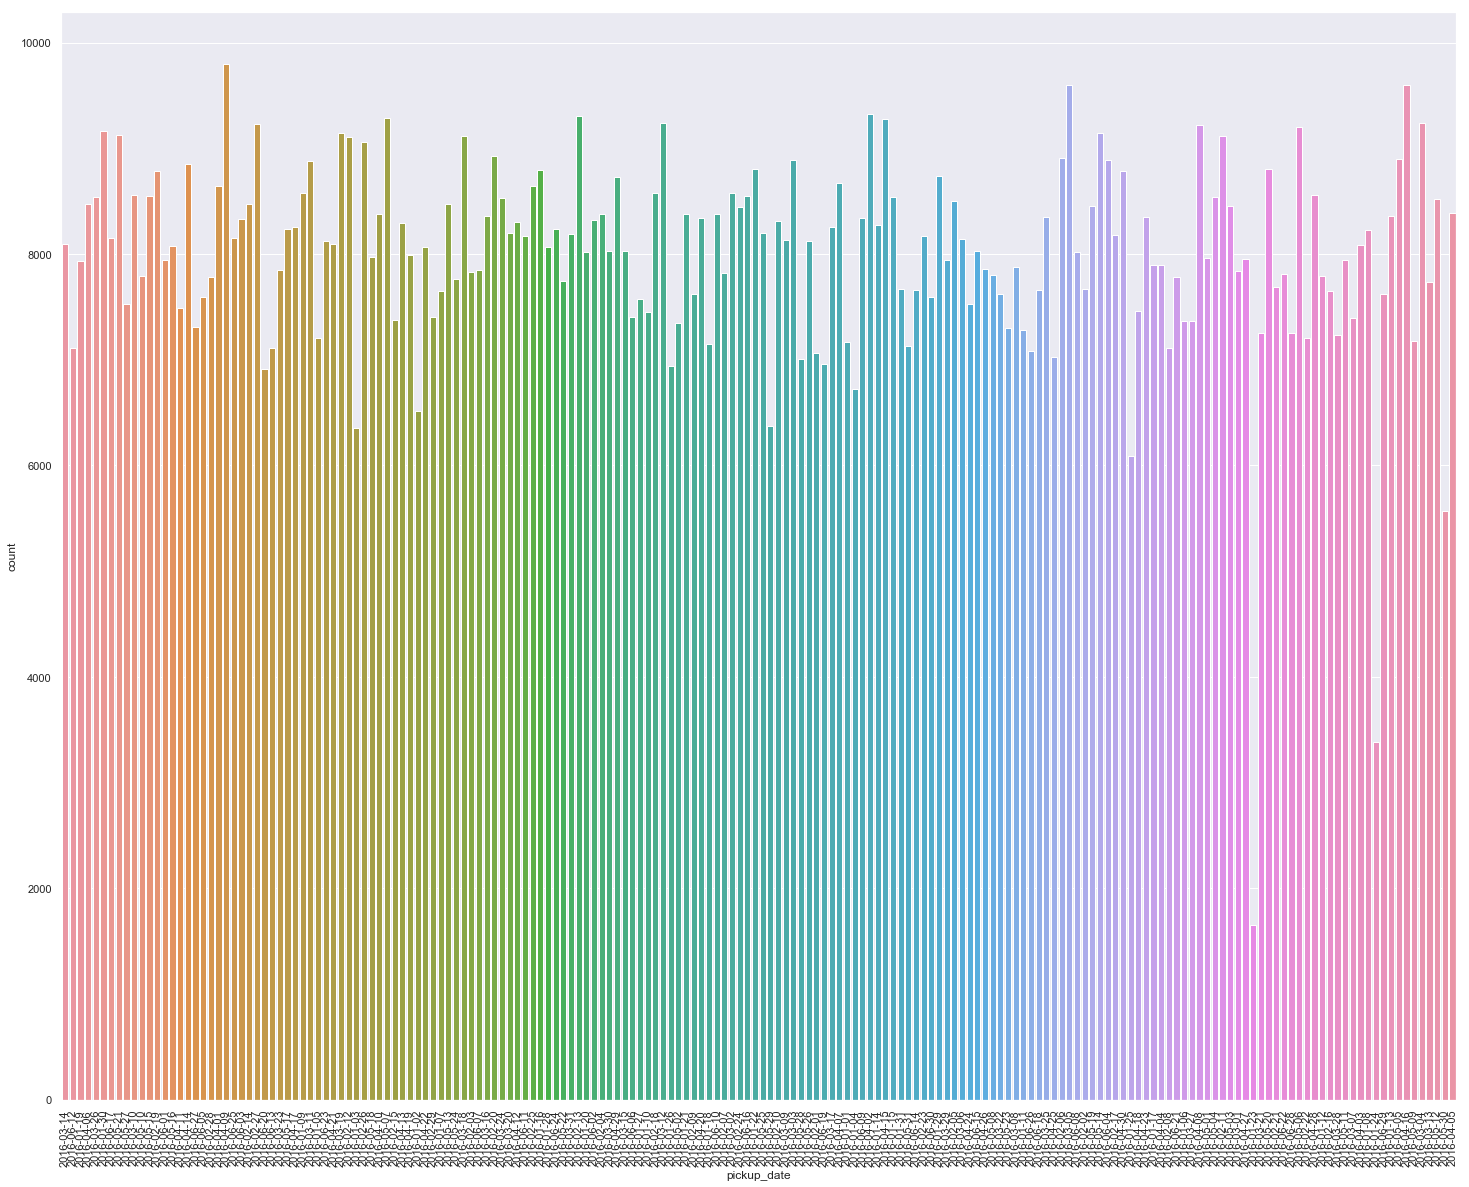

In [18]:
plt.figure(figsize=(25, 20))
sns.countplot(x='pickup_date', data=tmp)
plt.xticks(rotation=90)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

In [19]:
tmp.groupby('pickup_date').count().sort_values(by='pickup_datetime')[:2]

,pickup_datetime
pickup_date,
2016-01-23,1648
2016-01-24,3383


Сохраню эти даты в anomaly, потому что они позже понадобятся

In [20]:
anomaly = tmp.groupby('pickup_date').count().sort_values(by='pickup_datetime')[:2].index

$\textbf{A:}$  Выше видно, что аномально маленькое количество поездок было совершено 2016-01-23 и 2016-01-24. Интернет говорит, что в эти даты восток США переживал сильнейшие за столетие снегопады.


Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [21]:
tmp['weekday'] = tmp['pickup_date'].apply(lambda x: x.strftime("%a"))
tmp['hour'] = tmp['pickup_datetime'].apply(lambda x: x.hour)
tmp.rename(columns={'pickup_date' : 'number of trips'}, inplace=True)

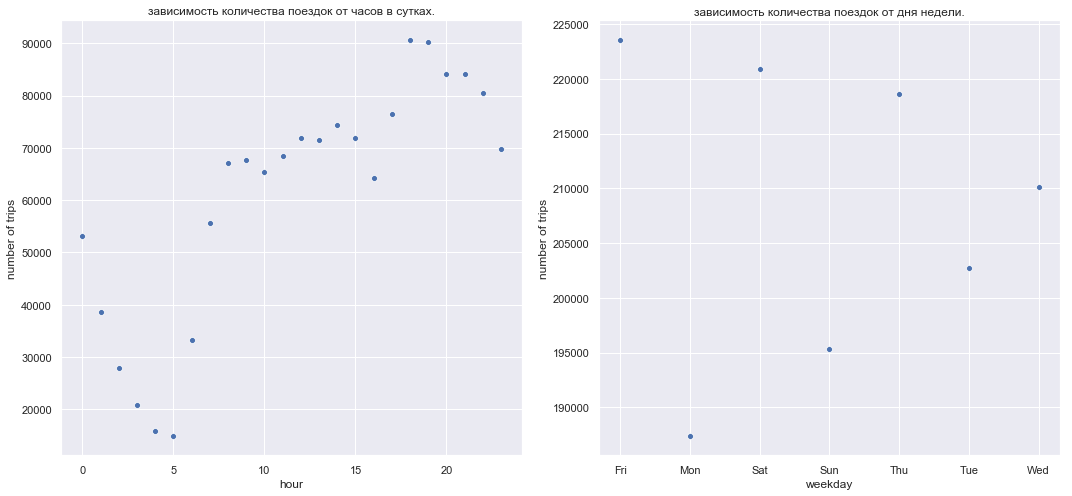

In [22]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=2)

g1 = sns.relplot(x='hour', y = 'number of trips', data=tmp.groupby(['hour'], as_index=False).count(), ax=axs[0])
axs[0].set_title("зависимость количества поездок от часов в сутках.")

g2 = sns.relplot(x='weekday', y = 'number of trips', data=tmp.groupby(['weekday'], as_index=False).count(), ax=axs[1])
axs[1].set_title("зависимость количества поездок от дня недели.")

plt.close(g1.fig)
plt.close(g2.fig) 
plt.tight_layout()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [23]:
tmp['month'] = tmp['pickup_datetime'].apply(lambda x: x.strftime("%b"))
tmp1 = tmp.groupby(['hour', 'month'], as_index=False).count()
tmp2 = tmp.groupby(['hour', 'weekday'], as_index=False).count()

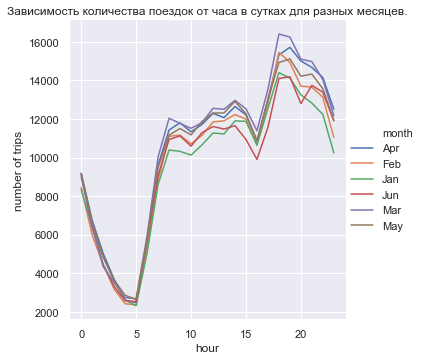

In [24]:
g1 = sns.relplot(x='hour', y = 'number of trips', hue = 'month', kind='line',data=tmp1)
plt.title("Зависимость количества поездок от часа в сутках для разных месяцев.")
plt.show()

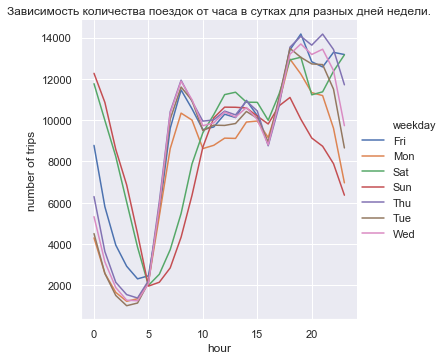

In [25]:
g2 = sns.relplot(x='hour', y = 'number of trips', hue = 'weekday', kind='line',data=tmp2)
plt.title("Зависимость количества поездок от часа в сутках для разных дней недели.")
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

$\textbf{A:}$ Для дней недели: до ~17 часов кривые, соответствующие выходным дням очень похожи и отличаются от кривых соответствующих будним дням, которые в свою очередь тоже очень похожи между собой. После 17 часов кривые для Sun и Sat идут в разных направлениях. Думаю, подобную схожесть можно понять интуитивно: ночью (с 0 до 5) количество поездок в выходные дни значительно больше, чем в буднии -- скорее всего люди отдыхают, допоздна проводя время где-то не дома. Так же в субботу после 17 количество поездок резко увеличивается в преддверии еще одного выходного дня, а в вск наоборот падает, так как на след день на работу((
Кривые для месяцев довольно похожи, но весной их больше.



**Задание 4 (0.5 баллов)**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

Проделаем все примерно то же самое, что и до этого.

In [26]:
df = X_train.copy()
df['pickup_date'] = df["pickup_datetime"].dt.date
df['weekday'] = df['pickup_date'].apply(lambda x: x.strftime("%a"))
df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
df['pickup_date'] = df['pickup_date'].apply(lambda x: x.strftime("%m-%d"))

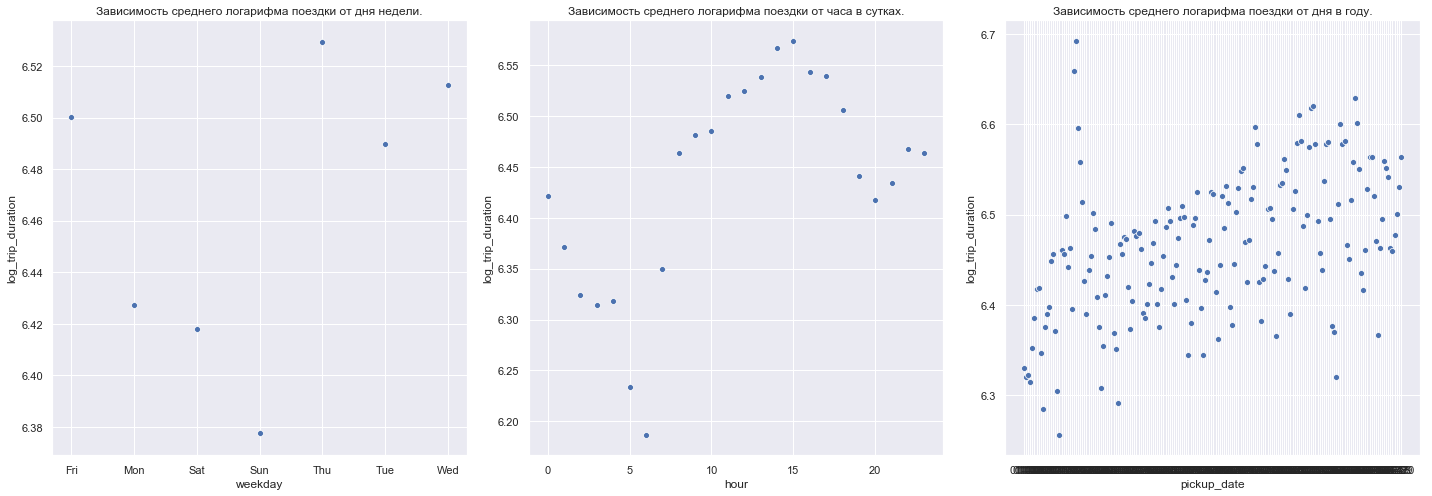

In [27]:
fig, axs = plt.subplots(figsize=(20, 7), ncols=3)

g1 = sns.relplot(x='weekday', y='log_trip_duration',data=df.groupby(['weekday'], as_index=False).mean(), ax=axs[0])
axs[0].set_title("Зависимость среднего логарифма поездки от дня недели.")

g2 = sns.relplot(x='hour', y='log_trip_duration',data=df.groupby(['hour'], as_index=False).mean(), ax=axs[1])
axs[1].set_title("Зависимость среднего логарифма поездки от часа в сутках.")

g3 = sns.relplot(x='pickup_date', y='log_trip_duration',data=df.groupby(['pickup_date'], as_index=False).mean(), ax=axs[2])
axs[2].set_title("Зависимость среднего логарифма поездки от дня в году.")

plt.close(g1.fig)
plt.close(g2.fig) 
plt.close(g3.fig) 
plt.tight_layout()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

$\textbf{A:}$ Да, похожи, особенно второй. Похожи, потому что в среднем, если количество в какой-то поездок маленькое, то и среднее время поездок в этот час будет маленьким, и наоборот. Да, кажется, что с каждым днем время поездки увеличивается, зависимость похожа на линейную

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [28]:
X_train['weekday'] = X_train['pickup_datetime'].apply(lambda x: x.date().strftime("%a"))
X_train['month'] = X_train['pickup_datetime'].apply(lambda x: x.date().strftime("%b"))
X_train['hour'] = X_train['pickup_datetime'].apply(lambda x: x.hour)
X_train['is_anomaly'] = X_train['pickup_datetime'].apply(lambda x: 1 if x.date() in anomaly else 0)
X_train['day_num'] =X_train['pickup_datetime'].apply(lambda x: x.date().timetuple().tm_yday)

In [29]:
X_test['weekday'] = X_test['pickup_datetime'].apply(lambda x: x.date().strftime("%a"))
X_test['month'] = X_test['pickup_datetime'].apply(lambda x: x.date().strftime("%b"))
X_test['hour'] = X_test['pickup_datetime'].apply(lambda x: x.hour)
X_test['is_anomaly'] = X_test['pickup_datetime'].apply(lambda x: 1 if x.date() in anomaly else 0)
X_test['day_num'] =X_test['pickup_datetime'].apply(lambda x: x.date().timetuple().tm_yday)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

$\textbf{A:}$ Из только что добавленных.
Категориальные: weekday, month. Потому что в отличие от численных не совсем ясно, как сравнивать данные признаки. Численные соответственно: hour, is_anomaly, day_num.


**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [30]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [31]:
categorical = list(['weekday', 'month'])
numeric_features = list(['hour', 'is_anomaly', 'day_num'])

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

$\textbf{A:}$ Сначала я не поняла на чем обучать, на log_trip_duration или просто trip_duration. Но результаты с логарифмом оказались лучше 0.7911 против 0.8874 соответственно.

In [33]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline1 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model1 = pipeline1.fit(X_train, y_train['log_trip_duration'])
y_pred = model1.predict(X_test)

In [34]:
print("Test RMSLE = %.4f" % rmse(y_test['log_trip_duration'], y_pred))

Test RMSLE = 0.7911


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [35]:
saved_X_train, saved_X_test, saved_y_train, saved_y_test = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [36]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [37]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [38]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [39]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

**Вопрос**: Какие две точки выделяются на карте?

$\textbf{A:}$  Видно, что точки соответсвующие аэропортам La Guardia Airport и John F Kennede Intl Airport выделяются на обеих картах.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [40]:
from haversine import haversine

In [41]:
X_train['haversine'] = X_train.apply(lambda x: haversine(
    (x['pickup_longitude'], x['pickup_latitude']),
    (x['dropoff_longitude'], x['dropoff_latitude'])
), axis=1)

In [42]:
X_test['haversine'] = X_test.apply(lambda x: haversine(
    (x['pickup_longitude'], x['pickup_latitude']),
    (x['dropoff_longitude'], x['dropoff_latitude'])
), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [43]:
X_train['log_haversine'] = np.log1p(X_train['haversine'])

In [44]:
X_test['log_haversine'] = np.log1p(X_test['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

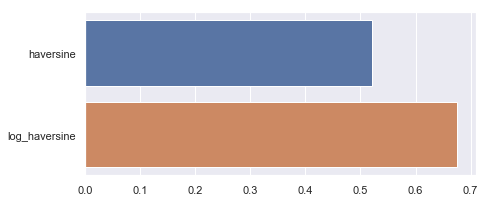

In [45]:
corrs = [np.corrcoef(X_train['haversine'], y_train['log_trip_duration'])[0][1],
         np.corrcoef(X_train['log_haversine'], y_train['log_trip_duration'])[0][1]]
features = ['haversine', 'log_haversine']
plot = sns.barplot(y=features, x=corrs)
plot.figure.set_size_inches(7, 3)

$\textbf{A:}$ Действительно, коэффциент корреляции логарифма расстояния ближе к +1, то есть связь с таргетом сильнее.

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [46]:
X_train['speed'] = X_train.haversine / (y_train['trip_duration'])

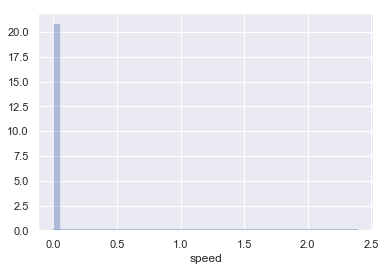

In [47]:
sns.distplot(X_train['speed'])
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [48]:
mask = (X_train['speed'] < np.quantile(X_train['speed'], 0.999))

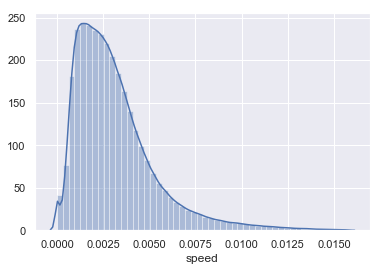

In [49]:
sns.distplot(X_train['speed'] * mask)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

Временно скорректируем датафрейм в соответствии нуждам.

In [50]:
temp = X_train.groupby(['weekday', 'hour'], as_index=False).median()
temp = temp.pivot('weekday', 'hour', 'speed')

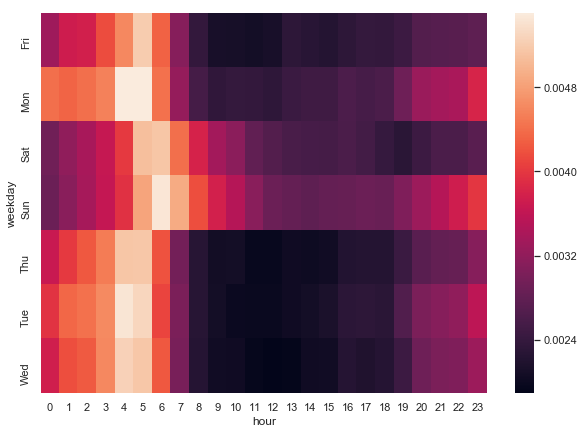

In [51]:
plt.figure(figsize=(10, 7))
sns.heatmap(temp)
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [52]:
X_train = X_train.drop(columns='speed')

$\textbf{A:}$
Мы хотим предсказывать длительность поездки -- это наш таргет, и при этом у нас в обучающей выборке есть  расстояние, поэтому хранить еще и скорость будет несколько бессмысленно. И + перегрузка данными

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

$\textbf{A:}$ Максимальная скорость достигается в 4, 5, 6 утра. Минимальная -- приблизительно с 8 до 19.



Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [53]:
def addJam(data):
    data['jam'] = data.apply(lambda x:
                               1 
                               if 
                               (x['weekday'] in ['Mon', 'Thu', 'Tue', 'Wed'] and x['hour'] >= 8 and x['hour'] <= 19)
                               or 
                               (x['weekday'] == 'Fri' and x['hour'] >= 8 and x['hour'] <= 23)
                               or
                               (x['weekday'] == 'Sat' and x['hour'] >= 12 and x['hour'] <= 23)
                               or
                               (x['weekday'] == 'Sun' and x['hour'] >= 12 and x['hour'] <= 18)
                               else
                               0
                               , axis=1)

In [54]:
addJam(X_train)

In [55]:
addJam(X_test)

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту.

Пусть точка будет относится к аэропорту, если она находится внутри $\varepsilon-$окрестности истинного положения аэропорта $\varepsilon = 0.02$

В функции airportFill добавлется новый признак начала или конца поездки (за это отвечает action_name, принимающий значения 'pickup' и 'dropoff' соответственно).

airport_name: 'lg' -- La Guardia, 'jf' -- John F Kennedy 

long и lat -- долгота и широта истинного положения аэропорта, от которого потом считается $\varepsilon-$окрестность.

$\varepsilon-$окрестность считается как модуль разности между широтой/долготой точки и истинным значением широты/долготы

In [56]:
def airportFill(data, airport_name, column_name, action_name):
    if (airport_name == 'lg'):
        long = -73.87
        lat = 40.77
    else:
        long = -73.78
        lat = 40.64
    eps = 0.02
    
    if (action_name == 'pickup'):
        action_long, action_lat = 'pickup_longitude', 'pickup_latitude'
    else:
        action_long, action_lat = 'dropoff_longitude', 'dropoff_latitude'
    
    data[column_name] = data.apply(lambda x :
                                      1 
                                      if 
                                      ((abs(x[action_long] - long) < eps)
                                      and
                                      (abs(x[action_lat] - lat) < eps))
                                      else
                                      0
                                      ,axis=1)

In [57]:
airportFill(X_train, 'lg', 'lg_air_pickup', 'pickup')
airportFill(X_test, 'lg', 'lg_air_pickup', 'pickup')
airportFill(X_train, 'lg', 'lg_air_dropoff', 'dropoff')
airportFill(X_test, 'lg', 'lg_air_dropoff', 'dropoff')

airportFill(X_train, 'jf', 'jf_air_pickup', 'pickup')
airportFill(X_test, 'jf', 'jf_air_pickup', 'pickup')
airportFill(X_train, 'jf', 'jf_air_dropoff', 'dropoff')
airportFill(X_test, 'jf', 'jf_air_dropoff', 'dropoff')

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

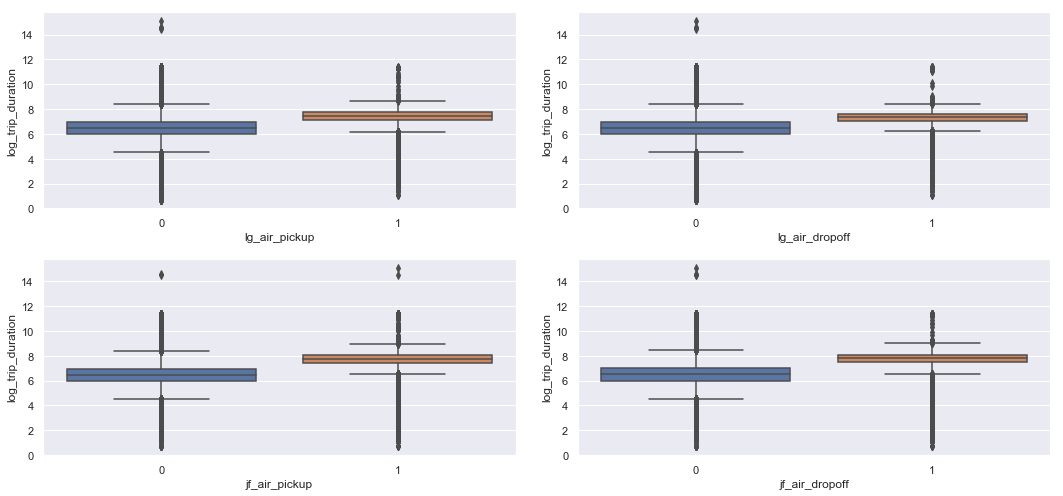

In [58]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=2, nrows=2)
g1 = sns.boxplot(x='lg_air_pickup', y='log_trip_duration', data=X_train, ax=axs[0][0])
g2 = sns.boxplot(x='lg_air_dropoff', y='log_trip_duration', data=X_train, ax=axs[0][1])
g3 = sns.boxplot(x='jf_air_pickup', y='log_trip_duration', data=X_train, ax=axs[1][0])
g4 = sns.boxplot(x='jf_air_dropoff', y='log_trip_duration', data=X_train, ax=axs[1][1])
plt.tight_layout()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Да, можно заметить, что средняя длительность любой поездки, заканчивающаяся или начинающаяся в обоих аэропортах, чуть выше, чем длительность поездок "по городу". То же самое можно сказать и о минимальной и максимальной длительности поездки до/из аэропорта. Этот признак дает важную информацию для определения таргета.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

1. Статистики я тут ниакие не считаю, поэтому fit у меня свободный.
2. Добавление признаков происходит в transform.
3. transfrom использует функцию zone_detect, которая вычисляет к какой ячейке относится координата.
4. Подробнее о zone_detect. 

1) Карту я разбила следующим образом: минимальная широта и долгота (левый нижний угол) 40.70, -74.02 соответсвенно. Верхний правый угол 40.80, -73.921

2) Всего 4 строки и 3 столбца, а это значит, что шаг по долготе имеет длину 0.033, а по широте -0.025. (если мы начинаем с верхнего левого угла)

3) c -- отвечает за номер столбца, а r -- за номер строки. Впоследствии ячейка вычисляется по формуле zone = r * 3 + c + 1

4) Итак, на вход функции подаются координаты: x -- широта, y -- долгота.

5) В одном цикле вычисляется в какой отрезок по широте(долготе) попадает координата x(y).

6) Каждый из таких отрезков попадания соответствует номеру строки(столбца), поэтому в цикле постоянно обновляется r(c)

7) Если ни r, ни с не равны -1 (то есть точка попала в какую-то ячейку прямоугльника), то ячейка вычисляется по формуле zone = r * 3 + c + 1. Иначе -1.

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def zone_detect(self, x, y):
        c, r = -1, -1
        long, lat = -74.02, 40.80
        while x >= 40.70 and x <= lat:
            r += 1
            lat -= 0.025
            # zone += 3
        while y <= -73.921 and y >= long:
            c += 1
            long += 0.033
            # zone += 1
        if c == -1 or r == -1:
            zone = -1
        else:
            zone = r * 3 + c + 1
        return zone
    def transform(self, X):
        df = X.copy()
        df['pickup_zone'] = df.apply(lambda x :
                                     self.zone_detect(x['pickup_latitude'], x['pickup_longitude'])
                                     , axis = 1)
        df['dropoff_zone'] = df.apply(lambda x :
                                     self.zone_detect(x['dropoff_latitude'], x['dropoff_longitude'])
                                     , axis = 1)
        return df

In [60]:
gridtransform = MapGridTransformer()

In [61]:
X_train = gridtransform.transform(X_train)
X_test = gridtransform.transform(X_test)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [62]:
X_train.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'log_trip_duration', 'weekday', 'month', 'hour',
       'is_anomaly', 'day_num', 'haversine', 'log_haversine', 'jam',
       'lg_air_pickup', 'lg_air_dropoff', 'jf_air_pickup', 'jf_air_dropoff',
       'pickup_zone', 'dropoff_zone'],
      dtype='object')

In [63]:
categorical = list(['weekday', 'month'])
numeric_features = list(['hour', 'is_anomaly', 'day_num', 'haversine' , 'log_haversine',
                         'jam', 'lg_air_pickup', 'lg_air_dropoff',
                         'jf_air_pickup', 'jf_air_dropoff', 'pickup_zone', 'dropoff_zone'])

In [64]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train['log_trip_duration'])
y_pred = model.predict(X_test)

In [65]:
print("Test RMSLE = %.4f" % rmse(y_test['log_trip_duration'],y_pred))

Test RMSLE = 0.5528


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [66]:
saved_X_train, saved_X_test, saved_y_train, saved_y_test = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [67]:
X_train['vendor_id'].nunique()

2

In [68]:
X_train['passenger_count'].nunique()

9

In [69]:
X_train['store_and_fwd_flag'].nunique()

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

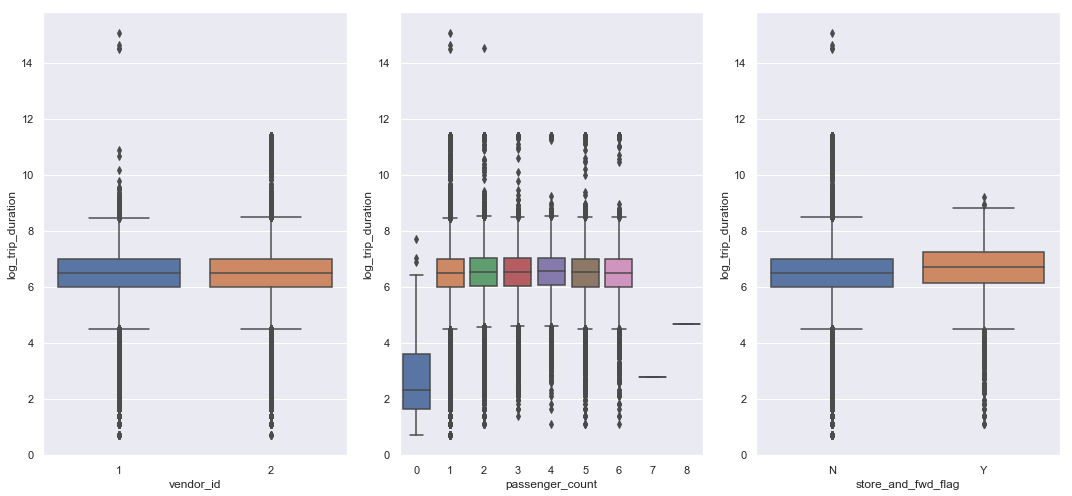

In [70]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
g1 = sns.boxplot(x='vendor_id', y='log_trip_duration', data=X_train, ax=axs[0])
g2 = sns.boxplot(x='passenger_count', y='log_trip_duration', data=X_train, ax=axs[1])
g3 = sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=X_train, ax=axs[2])

plt.tight_layout()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [71]:
X_train['vendor_id'] = X_train['vendor_id'].apply(lambda x : x % 2)
X_test['vendor_id'] = X_test['vendor_id'].apply(lambda x : x % 2)

In [72]:
X_train['store_and_fwd_flag'] = X_train['store_and_fwd_flag'].map({'N': 1, 'Y':0})
X_test['store_and_fwd_flag'] = X_test['store_and_fwd_flag'].map({'N': 1, 'Y':0})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Не очень, потому что видно, что в целом они распределены примерно одинаково

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [73]:
categorical = list(['weekday', 'month'])
numeric_features = list(['store_and_fwd_flag', 'passenger_count', 'vendor_id',
                         'hour', 'is_anomaly', 'day_num', 'haversine', 'log_haversine',
                         'jam', 'lg_air_pickup', 'lg_air_dropoff',
                         'jf_air_pickup', 'jf_air_dropoff', 'pickup_zone', 'dropoff_zone'])
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train['log_trip_duration'])
y_pred = model.predict(X_test)


In [74]:
print("Test RMSLE = %.4f" % rmse(y_test['log_trip_duration'],y_pred))

Test RMSLE = 0.5526


Выкидываем store_and_fwd_flag так как без него результат чуть лучше (на 0.0001)

In [75]:
X_train = X_train.drop(columns=['store_and_fwd_flag'])
X_test = X_test.drop(columns=['store_and_fwd_flag'])

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

Примечание к этой части: как бы я что-то не убирала, результаты становились только хуже...

In [76]:
saved_X_train, saved_X_test, saved_y_train, saved_y_test = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [217]:
X_train, X_test, y_train, y_test = saved_X_train.copy(), saved_X_test.copy(), saved_y_train.copy(), saved_y_test.copy()

In [77]:
def make_mask(data):
    q1, q3 = np.quantile(data, [0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    mask = (data < upper_bound) * (data > lower_bound)
    return mask

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

In [146]:
np.log1p(23 * 3600)

11.324195417595107

In [218]:
mask_log_td = (X_train['log_trip_duration'] > 2) * (X_train['log_trip_duration'] < 11)

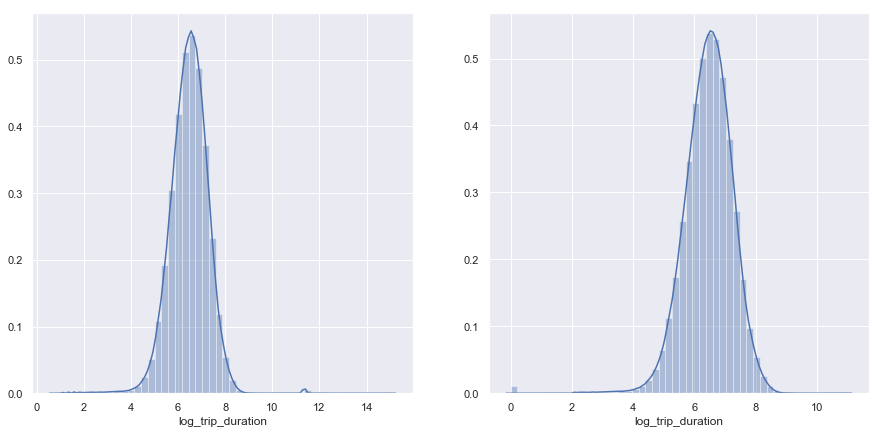

In [219]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=2)
sns.distplot(X_train['log_trip_duration'], ax=axs[0])
sns.distplot(X_train['log_trip_duration'] * mask_log_td, ax=axs[1])

In [220]:
X_train.drop(mask_log_td[mask_log_td == False].index, inplace=True)
y_train.drop(mask_log_td[mask_log_td == False].index, inplace=True)

Устраняем оч большие расстояния

In [209]:
mask_haversine = (X_train['haversine'] > 0 ) * (X_train['log_haversine'] < 6)
# mask_haversine = make_mask(X_train['log_haversine'])

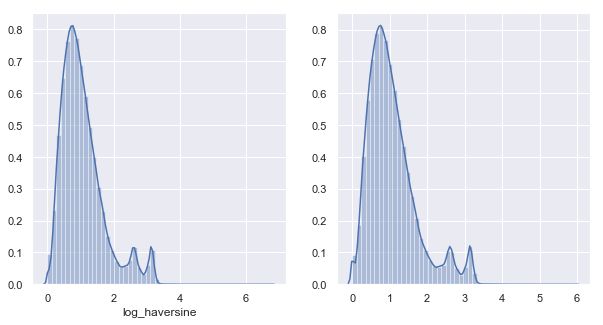

In [210]:
fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(X_train['log_haversine'], ax=axs[0])
sns.distplot(X_train['log_haversine'] * mask_haversine, ax=axs[1])

In [211]:
X_train.drop(mask_haversine[mask_haversine == False].index, inplace=True)
y_train.drop(mask_haversine[mask_haversine == False].index, inplace=True)

In [212]:
categorical = list(['weekday', 'month'])
numeric_features = list(['passenger_count', 'vendor_id',
                         'hour', 'is_anomaly', 'day_num', 'haversine', 'log_haversine',
                         'jam', 'lg_air_pickup', 'lg_air_dropoff',
                         'jf_air_pickup', 'jf_air_dropoff', 'pickup_zone', 'dropoff_zone'])
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train['log_trip_duration'])
y_pred = model.predict(X_test)

Теперь большие остатки регресии. Возьмем предсказание модели выше.

In [213]:
error = (np.log1p(y_train['log_trip_duration']) - np.log1p(model.predict(X_train))) ** 2
mask_error = error.dropna() < 0.9
#mask_error = make_mask(error.dropna())

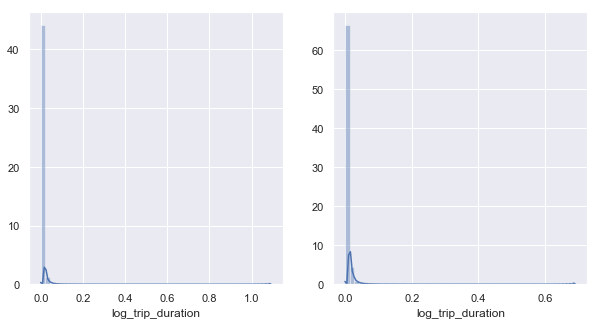

In [214]:
fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(error.dropna(), ax=axs[0])
sns.distplot(error.dropna() * mask_error, ax=axs[1])

In [215]:
X_train.drop(mask_error[mask_error == False].index, inplace=True)
y_train.drop(mask_error[mask_error == False].index, inplace=True)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

Сейчас у меня из категориальных признаков только 'month' и 'weekday', если посмотреть ниже, видно, что все категории не такие уж и редкие.

In [189]:
X_train.groupby('month').count().sort_values(by='hour')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,weekday,hour,...,day_num,haversine,log_haversine,jam,lg_air_pickup,lg_air_dropoff,jf_air_pickup,jf_air_dropoff,pickup_zone,dropoff_zone
month,,,,,,,,,,,,,,,,,,,,,
Jan,160941,160941,160941,160941,160941,160941,160941,160941,160941,160941,...,160941,160941,160941,160941,160941,160941,160941,160941,160941,160941
Jun,163997,163997,163997,163997,163997,163997,163997,163997,163997,163997,...,163997,163997,163997,163997,163997,163997,163997,163997,163997,163997
Feb,167088,167088,167088,167088,167088,167088,167088,167088,167088,167088,...,167088,167088,167088,167088,167088,167088,167088,167088,167088,167088
May,173646,173646,173646,173646,173646,173646,173646,173646,173646,173646,...,173646,173646,173646,173646,173646,173646,173646,173646,173646,173646
Apr,175787,175787,175787,175787,175787,175787,175787,175787,175787,175787,...,175787,175787,175787,175787,175787,175787,175787,175787,175787,175787
Mar,179591,179591,179591,179591,179591,179591,179591,179591,179591,179591,...,179591,179591,179591,179591,179591,179591,179591,179591,179591,179591


In [191]:
X_train.groupby('weekday').count().sort_values(by='hour')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,month,hour,...,day_num,haversine,log_haversine,jam,lg_air_pickup,lg_air_dropoff,jf_air_pickup,jf_air_dropoff,pickup_zone,dropoff_zone
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,131344,131344,131344,131344,131344,131344,131344,131344,131344,131344,...,131344,131344,131344,131344,131344,131344,131344,131344,131344,131344
Sun,136538,136538,136538,136538,136538,136538,136538,136538,136538,136538,...,136538,136538,136538,136538,136538,136538,136538,136538,136538,136538
Tue,141750,141750,141750,141750,141750,141750,141750,141750,141750,141750,...,141750,141750,141750,141750,141750,141750,141750,141750,141750,141750
Wed,147013,147013,147013,147013,147013,147013,147013,147013,147013,147013,...,147013,147013,147013,147013,147013,147013,147013,147013,147013,147013
Thu,152782,152782,152782,152782,152782,152782,152782,152782,152782,152782,...,152782,152782,152782,152782,152782,152782,152782,152782,152782,152782
Sat,154832,154832,154832,154832,154832,154832,154832,154832,154832,154832,...,154832,154832,154832,154832,154832,154832,154832,154832,154832,154832
Fri,156791,156791,156791,156791,156791,156791,156791,156791,156791,156791,...,156791,156791,156791,156791,156791,156791,156791,156791,156791,156791


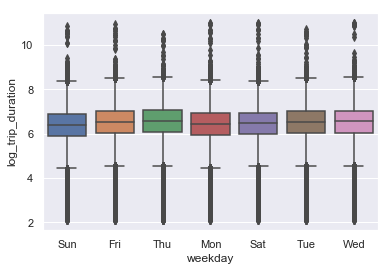

In [171]:
sns.boxplot(x='weekday', y='log_trip_duration', data=X_train)

In [172]:
# X_train['weekday'] = X_train['weekday'].apply(lambda x: 'SatMon' if x == 'Sat' or x == 'Mon' else x)
# X_test['weekday'] = X_test['weekday'].apply(lambda x: 'SatMon' if x == 'Sat' or x == 'Mon' else x)

In [182]:
# X_train['month'] = X_train['month'].apply(lambda x: 'FebJan' if x == 'Feb' or x == 'Jan' else x)
# X_test['month'] = X_test['month'].apply(lambda x: 'FebJan' if x == 'Feb' or x == 'Jan' else x)

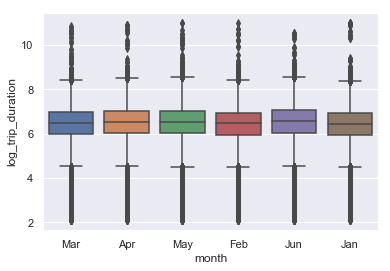

In [174]:
sns.boxplot(x='month', y='log_trip_duration', data=X_train)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [221]:
model = pipeline.fit(X_train, y_train['log_trip_duration'])
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmse(y_test['log_trip_duration'],y_pred))

Test RMSLE = 0.5528


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [193]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1021050, 22)
Size after OneHot: (1021050, 27)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?

In [195]:
from sklearn.linear_model import Lasso
lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train['log_trip_duration'])
y_pred = model.predict(X_test)
print("Test RMSlE = %.4f" % rmse(y_test['log_trip_duration'], y_pred))

Test RMSlE = 0.7943


Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [222]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [223]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 0, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], scoring=rmse_scorer, cv=10)
searcher.fit(X_valid, y_valid['log_trip_duration'])

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)


Best alpha = 0.0004


Text(0, 0.5, 'CV score')

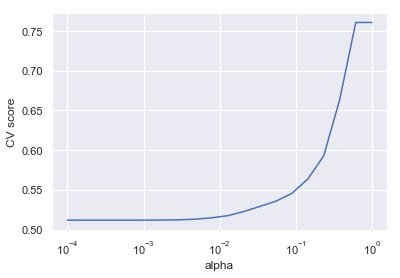

In [224]:
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [225]:
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train['log_trip_duration'])
y_pred = model.predict(X_test)
print("Test RMSlE = %.4f" % rmse(y_test['log_trip_duration'], y_pred))

Test RMSlE = 0.5528


Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

Что-то не разобралась, откуда брать коэффициенты, кроме как из pipeline.steps[-1][-1]

In [226]:
lasso_zeros = []
for alpha in alphas:
    pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha))
    ])
    model = pipeline.fit(X_train, y_train['log_trip_duration'])
    lasso_zeros.append(np.sum(pipeline.steps[-1][-1].coef_ == 0))

Text(0, 0.5, 'zeros')

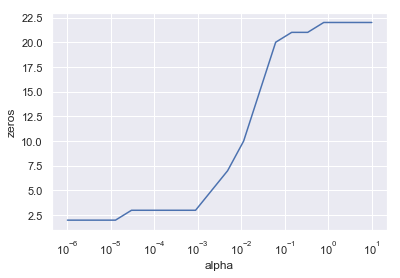

In [554]:
plt.plot(alphas, lasso_zeros)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("zeros")

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Все таки считать 100 пар по датасету или обучающей выборке?

 выделяю зону манхэттена: удаляю все колонки, в которых начало или конец поездки происходили вне зоны Манхэттена. Для этого создаю булевый массив cols_to_drop, а потом с его помощью удаляю ненужные колонки из датафрейма.

In [227]:
X_train_manhattan = X_train.copy()

In [228]:
cols_to_drop = (X_train_manhattan['pickup_zone'] == -1) | (X_train_manhattan['dropoff_zone'] == -1)
X_train_manhattan = X_train_manhattan.drop(cols_to_drop[cols_to_drop == True].index)

Далее я группирую X_train_manhattan по pickup_zone и dropoff_zone, сортирую в невозрастающем порядке и выбираю первые 100 строк датафрейма (это 100 самых частых пар).

In [229]:
popular_trips100_df = X_train_manhattan.groupby(['pickup_zone', 'dropoff_zone'], as_index=False).count().sort_values(
    by='pickup_datetime', ascending=False)[:100].loc[:, 'pickup_zone':'dropoff_zone']

In [230]:
popular_trips100_df.head()

,pickup_zone,dropoff_zone
52,5,5
78,7,7
76,7,5
49,5,2
54,5,7


Создаю множество самых популярных пар, а потом добавляю в выборку новую колонку, отвечающую за признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка". Для этого просто проверяю содержится ли pickup_zone и dropoff_zone объекта в множестве самых популярных пар, если да, то делаю значение признака равным zoneXX, иначе "-1".

In [231]:
popular_trips100 = set()
for index, row in popular_trips100_df.iterrows():
    b = (row['pickup_zone'], row['dropoff_zone'])
    popular_trips100.add(b)

In [232]:
X_train['trip_direction'] = X_train.apply(lambda x: 'zone'+str(x['pickup_zone'])+str(x['dropoff_zone'])
                                          if (x['pickup_zone'], x['dropoff_zone']) in popular_trips100
                                          else
                                          str(-1)
                                          ,axis=1)

In [233]:
X_test['trip_direction'] = X_test.apply(lambda x: 'zone'+str(x['pickup_zone'])+str(x['dropoff_zone'])
                                          if (x['pickup_zone'], x['dropoff_zone']) in popular_trips100
                                          else
                                          str(-1)
                                          ,axis=1)

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [234]:
categorical = list(['weekday', 'month', 'trip_direction'])
numeric_features = list(['passenger_count', 'vendor_id',
                         'hour', 'is_anomaly', 'day_num', 'haversine', 'log_haversine',
                         'jam', 'lg_air_pickup', 'lg_air_dropoff',
                         'jf_air_pickup', 'jf_air_dropoff', 'pickup_zone', 'dropoff_zone'])
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

In [235]:
model = pipeline.fit(X_train, y_train['log_trip_duration'])
y_pred = model.predict(X_test)
print("Test RMSlE = %.4f" % rmse(y_test['log_trip_duration'], y_pred))

Test RMSlE = 0.5215


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [237]:
tp_X_train, tp_X_test = X_train.copy(), X_test.copy()

In [238]:
from math import cos, sin, radians, sqrt

In [243]:
def rotation_matrix(alpha):
    '''матрица поворота для того, чтобы 
    оси координатой сис-мы были параллельны
    улицам'''
    return [[cos(alpha), -sin(alpha)],[sin(alpha), cos(alpha)]]

def manhattan(a, b, alpha):
    '''
    A(a0, a1)
    B(b0, b1)
    d(A, B) = |a0 - b0| + |a1 - b1|
    '''
    rotmat = rotation_matrix(alpha)
    x = a[0]-b[0]
    y = (a[1]-b[1])
    res = np.dot(rotmat,[x, y])
    return abs(res[0])+abs(res[1])

In [240]:
tp_X_train['manhattan'] = tp_X_train.apply(lambda x: 
                                           manhattan([x['pickup_longitude'], x['pickup_latitude']],
                                                              [x['dropoff_longitude'], x['dropoff_latitude']],
                                                              radians(30))
                                           ,axis=1)

In [242]:
tp_X_test['manhattan'] = tp_X_test.apply(lambda x: 
                                           manhattan([x['pickup_longitude'], x['pickup_latitude']],
                                                              [x['dropoff_longitude'], x['dropoff_latitude']],
                                                              radians(30))
                                           ,axis=1)

In [244]:
tp_X_train['log_manhattan'] = np.log1p(tp_X_train['manhattan'])
tp_X_test['log_manhattan'] = np.log1p(tp_X_test['manhattan'])

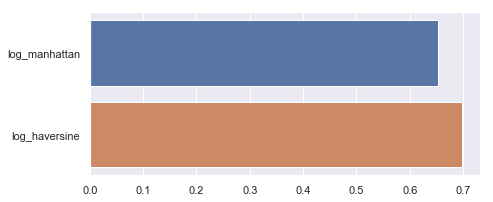

In [245]:
corrs = [np.corrcoef(tp_X_train['log_manhattan'], y_train['log_trip_duration'])[0][1],
         np.corrcoef(tp_X_train['log_haversine'], y_train['log_trip_duration'])[0][1]]
features = ['log_manhattan', 'log_haversine']
plot = sns.barplot(y=features, x=corrs)
plot.figure.set_size_inches(7, 3)

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [246]:
categorical = list(['weekday', 'month', 'trip_direction'])
numeric_features = list(['passenger_count', 'vendor_id',
                         'hour', 'is_anomaly', 'day_num', 'haversine', 'log_haversine',
                         'jam', 'lg_air_pickup', 'lg_air_dropoff',
                         'jf_air_pickup', 'jf_air_dropoff', 'pickup_zone', 'dropoff_zone', 'manhattan',
                        'log_manhattan'])
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(tp_X_train, y_train['log_trip_duration'])
y_pred = model.predict(tp_X_test)
print("Test RMSlE = %.4f" % rmse(y_test['log_trip_duration'], y_pred))

Test RMSlE = 0.5017


<img src="https://www.dropbox.com/s/xf1uwfkao3eflgg/zaeb2000.jpg?raw=1">

Источники:
https://www.kaggle.com/hpulkkinen/using-the-manhattan-distance-with-random-forest
https://www.kaggle.com/headsortails/nyc-taxi-eda-update-the-fast-the-curious/code